In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [8]:
raw_train=pd.read_csv('totalpred.csv')

In [9]:
train=pd.get_dummies(raw_train,columns=['Department','Gender','Field','Quota'])

In [11]:
regr = RandomForestRegressor(n_estimators=200,min_samples_split=4,min_samples_leaf=2,random_state=0)
x=train.drop(['Package'],axis=1)
y=train['Package']

In [12]:
regr.fit(x,y)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, n_estimators=200,
                      random_state=0)

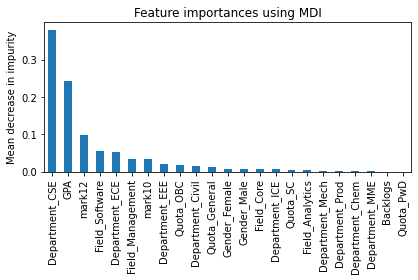

In [17]:
forest_importances = pd.Series(regr.feature_importances_, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()